#**Python Visualizing Data**

Visualising data is important as it can help us spot trends and correlations that are not immediately identifiable in the raw data. Data can be represented in many different forms including bar charts, pie charts and boxplots and many more.

This tutorial will introduce you to visualising data in Python including the following:

* Scatter plots
* Pie charts 
* Line charts
* Bar charts
* Histograms
* Box plots
* Heatmap (correlation)
* Subplots


We will be using the following libraries: 
```
- pandas
- matplotlib
- seaborn

```

Each time you create a visualisation, the key thing you need to consider is: What are you trying to show the user? Creating visualisations isn't just about creating pretty graphs, it is ensuring that the chart summarises the data efficiently and effectively. 

The below infographic provides you with a starting point in helping you choose the right chart to fit your data and the narrative you would like to portray:

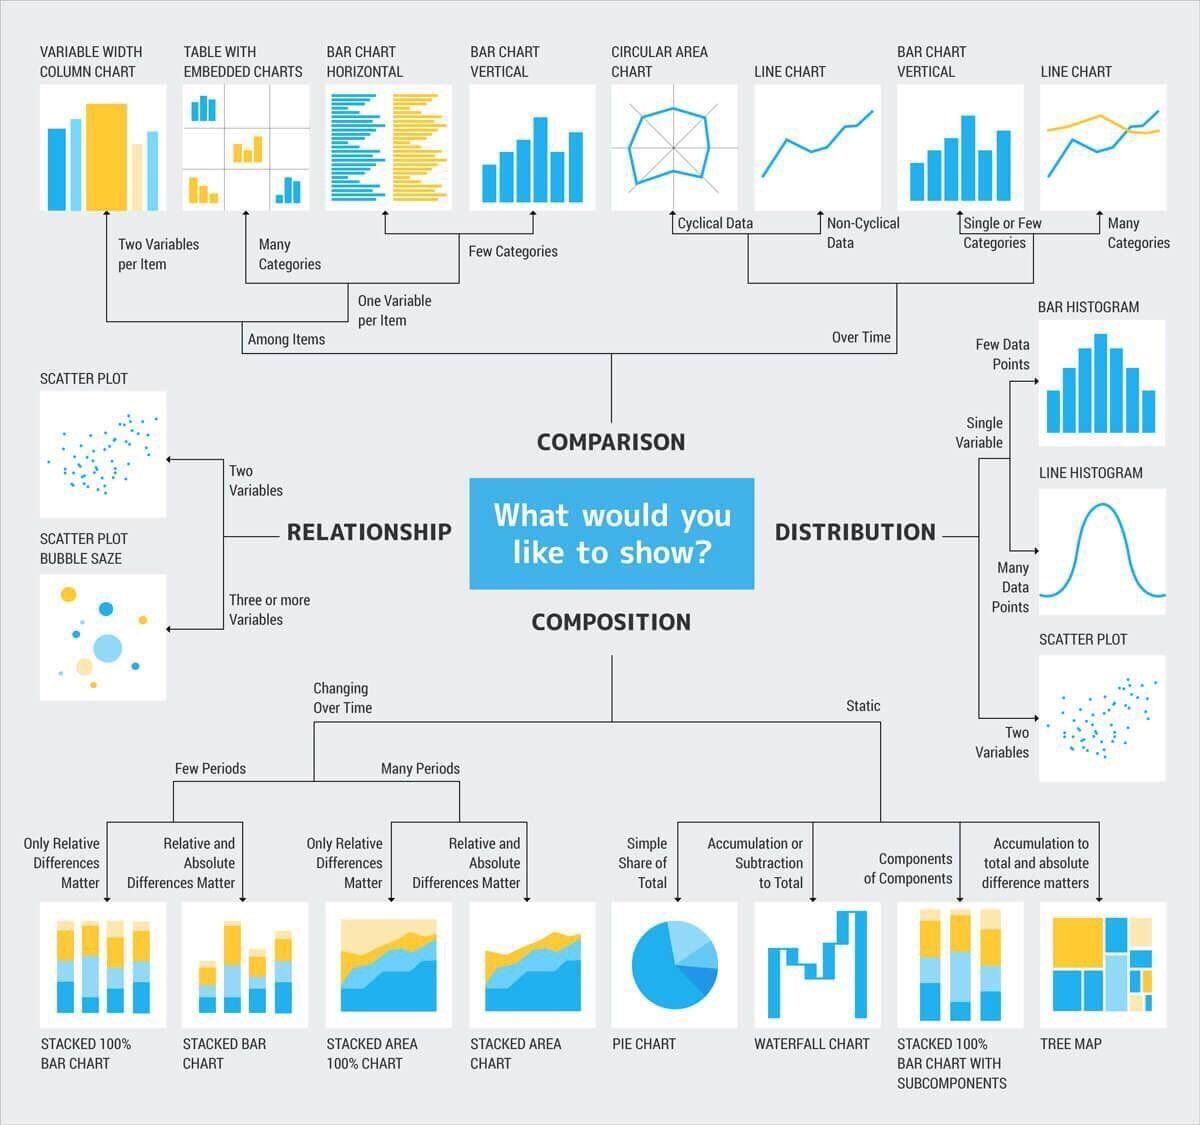

## **Libraries**
Of the many Python libraries out there that can produce data visualisations, we will be focusing on matplotlib and seaborn:

**Matplotlib** 

Matplotlib is the most popular Python library for creating visualisations. It has a Matlab-like interface that offers lots of freedom at the cost of having to write more code.

**Seaborn**

Seaborn is another popular visualisation library based on matplotlib. It is more high-level than matplotlib and allows you to create attractive graphs in fewer lines of cod.


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### **Data Import**

We will be utilising the Penguins dataset to create our visualisations.

In [ ]:
penguins = sns.load_dataset("penguins")
penguins.head(5)

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female


## **Scatter plots**

A scatter plot uses dots to represent values for two different numeric variables. Scatter plots are used to observe relationships between variables.

### Matplotlib

To create a visualisation in matplotlib, firstly we create the figure and axis with the following code:

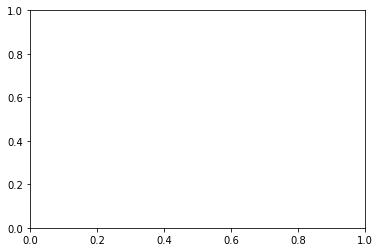

In [ ]:
# create a figure and axis
fig, ax = plt.subplots()

Then we can use the `scatter` function to overlay a scatter plot on top of the axis created. In this case we are comparing flipper length with body mass.

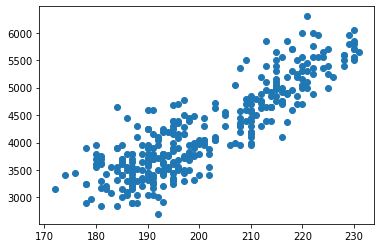

In [ ]:
# create a figure and axis
fig, ax = plt.subplots()

# scatter the flipper_length_mm against the body_mass_g
ax.scatter(penguins['flipper_length_mm'], penguins['body_mass_g'])

Finally we can use set_title, set_xlabel and set_ylabel to add a title as well as labels to the axis. By using ; at the end of our code, we can remove the path off the top of the visualisation.

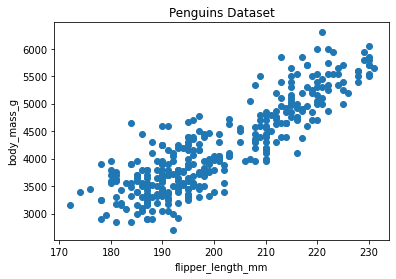

In [ ]:
# create a figure and axis
fig, ax = plt.subplots()

# scatter the flipper_length_mm against the body_mass_g
ax.scatter(penguins['flipper_length_mm'], penguins['body_mass_g'])

# set a title and labels
ax.set_title('Penguins Dataset')
ax.set_xlabel('flipper_length_mm')
ax.set_ylabel('body_mass_g');

Another interesting layer we can overlay onto the visualisation is colouring each data point by its species. We do this through creating a dictionary that maps from species to color and scattering each point on its own using a for-loop and passing the respective colour.

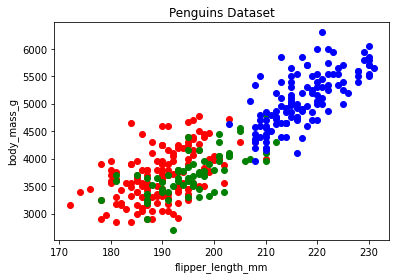

In [ ]:
# create color dictionary
colours = {'Adelie':'r', 'Chinstrap':'g', 'Gentoo':'b'} 

# create a figure and axis
fig, ax = plt.subplots()

# plot each data-point
for i in range(len(penguins['flipper_length_mm'])):
    ax.scatter(penguins['flipper_length_mm'][i], penguins['body_mass_g'][i],color=colours[penguins['species'][i]])

# set a title and labels
ax.set_title('Penguins Dataset')
ax.set_xlabel('flipper_length_mm')
ax.set_ylabel('body_mass_g');

### Seaborn
As you will see below, to create a similar plot in seaborn we require significantly less code:

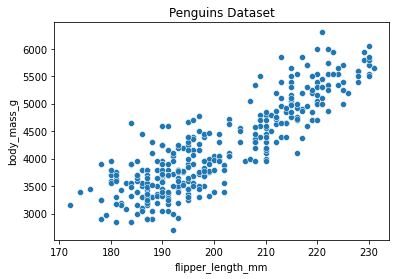

In [ ]:
sns.scatterplot(x='flipper_length_mm', y='body_mass_g', data=penguins).set_title("Penguins Dataset");

To add the colour coding by species we just introduce the `hue` parameter:

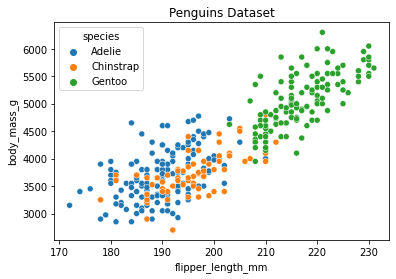

In [ ]:
sns.scatterplot(x='flipper_length_mm', y='body_mass_g', hue='species', data=penguins).set_title("Penguins Dataset");

### Exercise 1
Using the iris dataset, create a scatter chart showing the correlation between sepal length and petal length. You may use a library of your choice.

In [ ]:
iris = sns.load_dataset("iris")
iris.head(5)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [ ]:
#Enter answer here


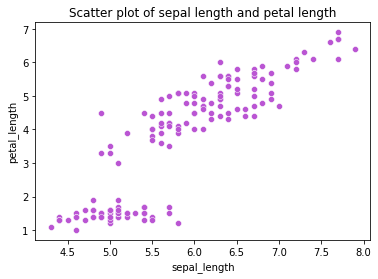

In [ ]:
#@title Click here for answers
sns.scatterplot(x='sepal_length', y='petal_length', data=iris, color = 'mediumorchid').set_title("Scatter plot of sepal length and petal length");

## **Pie chart**

Pie charts use different-sized sectors of a circle to represent data. They show proportions rather than total amounts.

Note - seaborn does not have a pie chart function.

### Matplotlib
We will be using the `pie` function. In the below function we are having to use `penguins['island'].value_counts()` to format the data into the format that can be used with the function. 

In [ ]:
island = penguins['island'].value_counts()
island

Biscoe       168
Dream        124
Torgersen     52
Name: island, dtype: int64

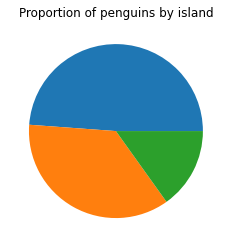

In [ ]:
# create a figure and axis
fig, ax = plt.subplots()

# create pie chart
ax.pie(island) 

# set a title 
ax.set_title('Proportion of penguins by island');



This graph is missing some essential details like labels. We can customise the graph as follows:

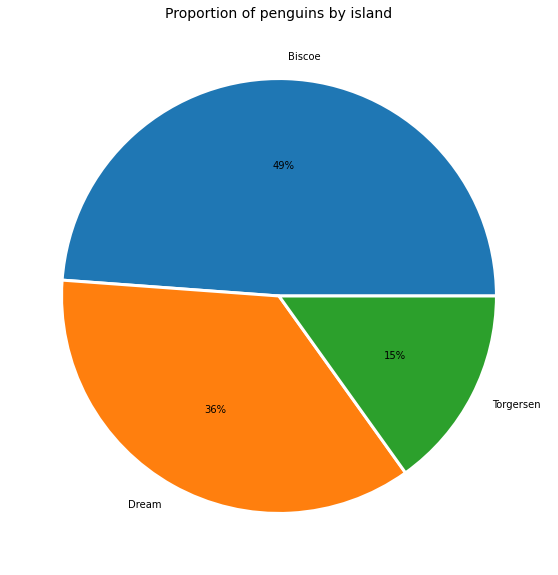

In [ ]:
# create a figure and axis
fig, ax = plt.subplots(figsize=(16,10)) #increase figure size

#labels 
labels = island.index

# create pie chart
ax.pie(island, 
       labels=labels,  #add labels
       autopct='%.0f%%', #add percentages
       wedgeprops = { 'linewidth' : 3, 'edgecolor' : 'white' } #add lines between segments
       ) 

# set a title 
ax.set_title('Proportion of penguins by island', fontsize=14);


We can explode out a segment of our pie chart.

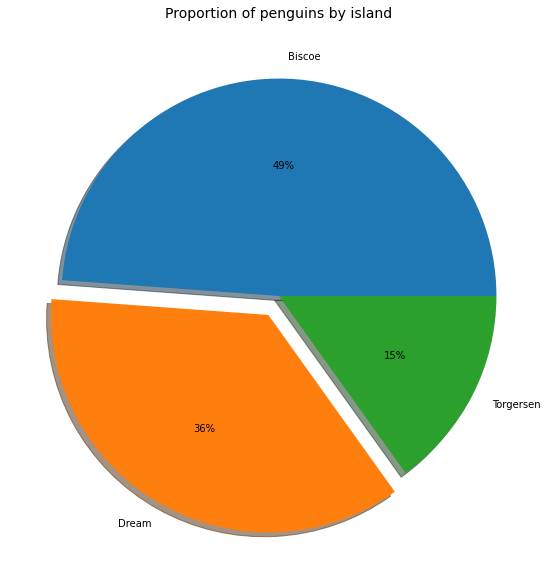

In [ ]:
# create a figure and axis
fig, ax = plt.subplots(figsize=(16,10)) #increase figure size

#labels 
labels = island.index

# declaring exploding pie
explode = [0, 0.1, 0] # a positive number indicates the segment that is to be exploded. Can also indicate the degree of explosion

# create pie chart
ax.pie(island, 
       labels=labels, #add labels
       explode=explode, #explode
       shadow=True, #add shadow
       autopct='%.0f%%' #add percentages
       ) 

# set a title 
ax.set_title('Proportion of penguins by island', fontsize=14)

# displaying chart
plt.show();


### Exercise 2

Using the iris dataset, create a pie chart of species with the species 'virginica' exploded out. Ensure it is correctly labelled and colour it with your choice of colours.

In [ ]:
#Enter answer here


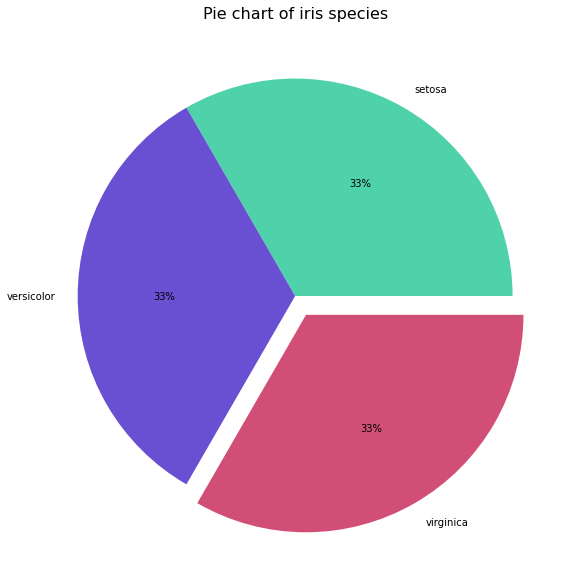

In [ ]:
#@title Click here for answers

# format data
species_iris = iris['species'].value_counts()
species_iris

# create a figure and axis
fig, ax = plt.subplots(figsize=(16,10)) #increase figure size

#labels 
labels = species_iris.index

#create colour palette
palette=['#4FD1AA','#694FD1','#D14F76']

# declaring exploding pie
explode = [0, 0, 0.1] # a positive number indicates the segment that is to be exploded. Can also indicate the degree of explosion

# create pie chart
ax.pie(species_iris, labels=labels, explode=explode, autopct='%.0f%%', colors=palette) 

# set a title 
ax.set_title('Pie chart of iris species', fontsize=16)

# displaying chart
plt.show();

## **Line chart**

Line charts use points connected by line segments from left to right to demonstrate changes in value. The horizontal axis depicts a continuous progression and the vertical axis reports values for a metric of interest across that progression. 

Line charts are useful tools for quick analysis of time series data. This is a series of data points indexed in time order. 

A time series can be decomposed into:

* Base Level: The average value in the series.
* Trend: An increasing or decreasing slope in the time series.
* Seasonality: A distinct repeating pattern between regular intervals.
* Error: The random variation in the series that we can't predict


Note: Not all time series must have trend and/or seasonality.


In the following examples we will be using the flights dataset from seaborn.

In [ ]:
flights = sns.load_dataset("flights")
flights.head(5)

,year,month,passengers
0,1949,Jan,112
1,1949,Feb,118
2,1949,Mar,132
3,1949,Apr,129
4,1949,May,121


###Matplotlib

We will be using the `plot` method. 

We will restrict the dataset to January flights.

In [ ]:
#Create a dataframe with month restricted to January
january_flights = flights[flights['month']=='Jan']
january_flights.head(3)

,year,month,passengers
0,1949,Jan,112
12,1950,Jan,115
24,1951,Jan,145


Create a line graph using the `plot` method.

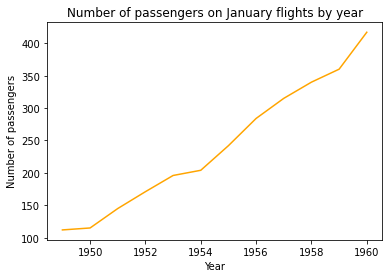

In [ ]:
# create a figure and axis
fig, ax = plt.subplots()

# plot the number of passengers by the year
ax.plot(january_flights["year"], january_flights["passengers"], color = 'orange')

# set a title and labels
ax.set_title('Number of passengers on January flights by year')
ax.set_xlabel('Year')
ax.set_ylabel('Number of passengers');

plt.plot
plt.show();

We can observe that the **trend** of number of passengers on January flights is increasing over the years. We can also note that there is no **seasonality**.

Through creating a new field which combines both the month and year columns into a singular 'date' field, we can see the trend over time. 

In [ ]:
#Convert month data type to a string 
flights['month'] = flights.month.astype(str)

#Combine the two fields and convert to datetime
flights['Date'] =pd.to_datetime(flights['month']+flights['year'].astype(str),format='%b%Y')

#for months periods
flights['Date'] = flights['Date'].dt.to_period('m')
#for 2010-02 format
flights['Date'] = flights['Date'].dt.strftime('%Y-%m')

flights.head()

,year,month,passengers,Date
0,1949,Jan,112,1949-01
1,1949,Feb,118,1949-02
2,1949,Mar,132,1949-03
3,1949,Apr,129,1949-04
4,1949,May,121,1949-05


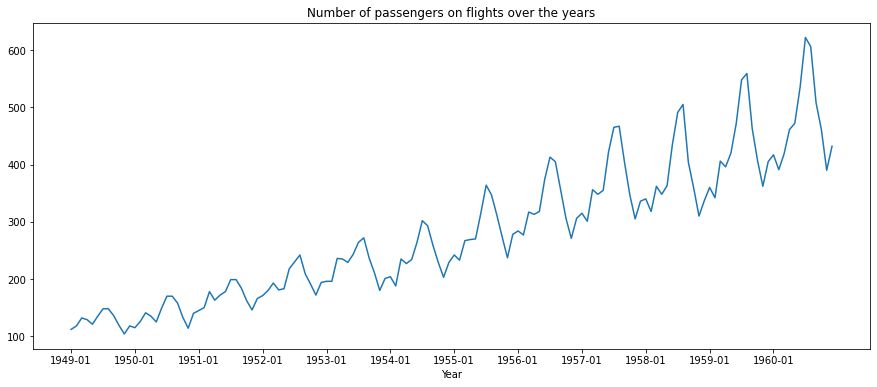

In [ ]:
# create a figure and axis
fig, ax = plt.subplots(figsize=(15, 6))

# scatter the flipper_length_mm against the body_mass_g
ax.plot(flights["Date"], flights["passengers"])

# set a title and labels
ax.set_title('Number of passengers on flights over the years')
ax.set_xlabel('Year')

# set to only show one tick on x axis per year 
ax.set_xticks(flights["Date"][::12])

plt.plot
plt.show();

In this line graph we can see there is both an increasing **trend** over time as well as a clear **seasonality** to the data - the number of passengers on flights rises in the summer and falls in the winter.

###Seaborn

We can utilise the previously made January flights subset of data to create a similar line graph in Seaborn using `lineplot`.

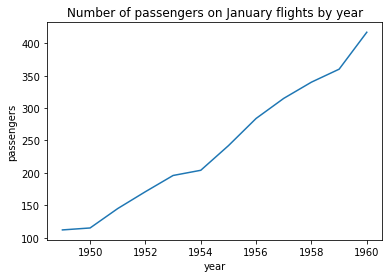

In [ ]:
sns.lineplot(data=january_flights, x="year", y="passengers").set_title("Number of passengers on January flights by year");

We can utilise this method to create graphs that show us the trends by month. We can utilise the seaborn 'rainbow' palette to add colour to this graph.

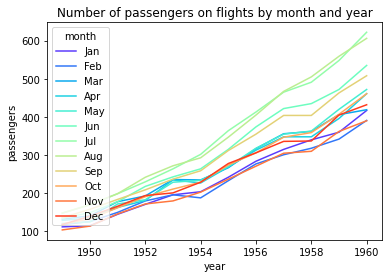

In [ ]:
sns.lineplot(data=flights, x="year", y="passengers", hue="month", palette="rainbow").set_title("Number of passengers on flights by month and year");

Finally, we can look at the data over the months and years.

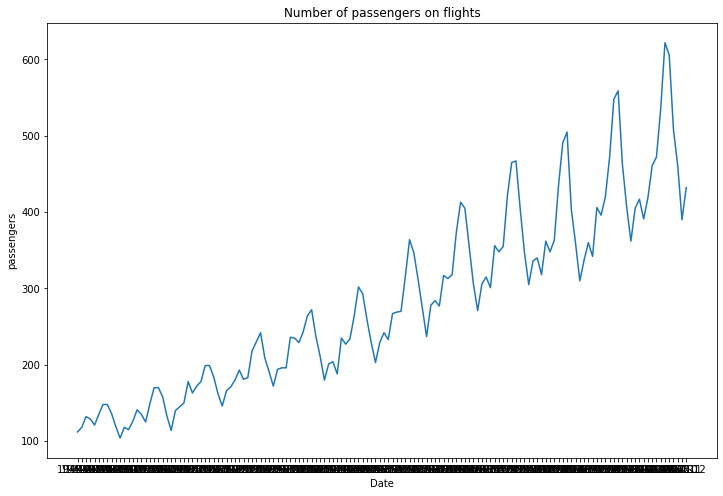

In [ ]:
plt.figure(figsize=(12,8)) #use matplotlib to create a larger figure

sns.lineplot(data=flights, x="Date", y="passengers", palette="rainbow").set_title("Number of passengers on flights");


###Exercise 3

Use the flight data to plot a line graph showing only data from 1949 and 1950. You should use date along the x axis and passengers along the y axis. Please customise the graph however you wish.

In [ ]:
#Enter answer here


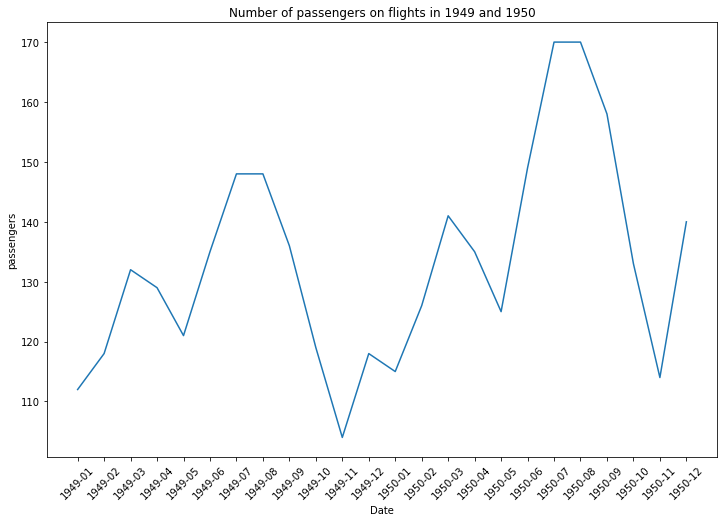

In [ ]:
#@title Click here for answers
#Prepare the data
flights_49_50 = flights[flights['year'].isin([1949, 1950])]

#Assign figure size
plt.figure(figsize=(12,8))

#Rotate x ticks to be readable
plt.xticks(rotation=45)

#Plot line graph
sns.lineplot(data=flights_49_50, x="Date", y="passengers").set_title("Number of passengers on flights in 1949 and 1950");

## **Bar chart**
A bar chart uses bars to compare between categories of data. These bars can be displayed horizontally or vertically.

###Matplotlib

We can create a bar chart using the `bar` method. As the bar chart doesn't automatically calculate the frequency of a category, we will use pandas value_counts method to do this. 

In [ ]:
#Prepare the data into the correct format

# count the occurrence of each class 
data = penguins['species'].value_counts() 

# get x and y data 
species = data.index 
frequency = data.values 


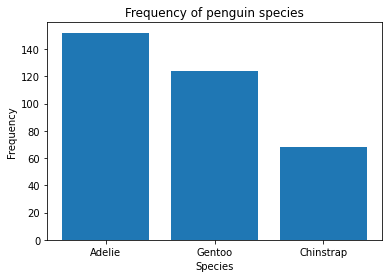

In [ ]:
# create a figure and axis 
fig, ax = plt.subplots() 

# create bar chart 
ax.bar(species, frequency) 

# set title and labels 
ax.set_title('Frequency of penguin species') 
ax.set_xlabel('Species') 
ax.set_ylabel('Frequency');

We can flip this to a horizontal bar chart by using `barh`.

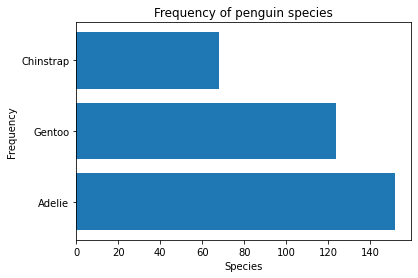

In [ ]:
# create a figure and axis 
fig, ax = plt.subplots() 

# create bar chart 
ax.barh(species, frequency) 

# set title and labels 
ax.set_title('Frequency of penguin species') 
ax.set_xlabel('Species') 
ax.set_ylabel('Frequency');

###Seaborn
In seaborn we can use `countplot` to create our bar chart.

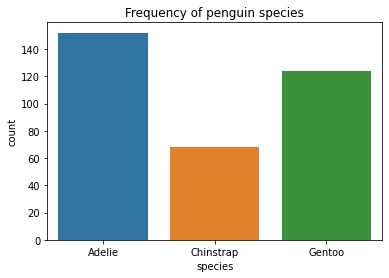

In [ ]:
sns.countplot(data = penguins, x='species').set_title('Frequency of penguin species');

We can flip this to a horizontal barchart by changing `x='species'` to `y='species'`.

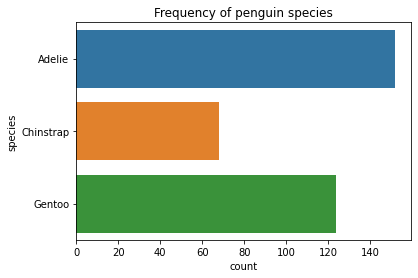

In [ ]:
sns.countplot(data = penguins, y='species').set_title('Frequency of penguin species');

In matplotlib the bars were automatically ordered from largest to smallest. We can do this in seaborn by ultising the `order` parameter.

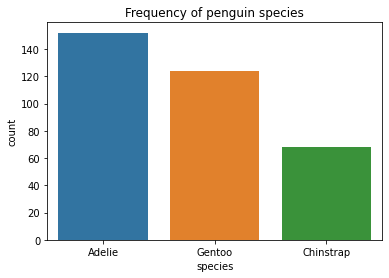

In [ ]:
#Descending order
sns.countplot(data = penguins, x='species', order = penguins['species'].value_counts().index).set_title('Frequency of penguin species');

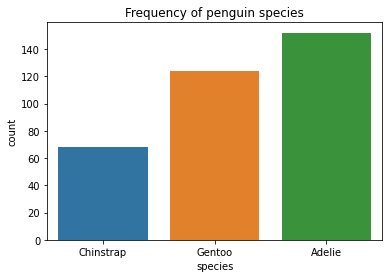

In [ ]:
#Ascending order
sns.countplot(data = penguins, x='species', order = penguins['species'].value_counts(ascending=True).index).set_title('Frequency of penguin species');

We can utilise the hue parameter to include another categorical variable into our bar chart.

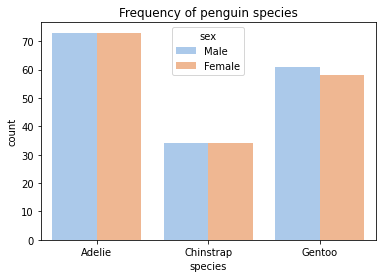

In [ ]:
sns.countplot(data = penguins, x='species', hue='sex', palette='pastel').set_title('Frequency of penguin species');

###Exercise 4
Using the iris dataset, plot a bar chart showing the total number of species of iris in the dataset. Please customise as you wish

In [ ]:
#Enter answer here

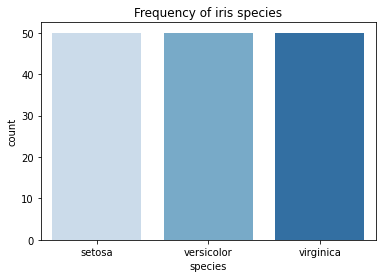

In [ ]:
#@title Click here for answers
sns.countplot(data = iris, x='species', palette='Blues').set_title('Frequency of iris species');

##**Histogram**

A histogram is similar to a bar chart however it is the area of the bar rather than the height which shows the frequency of the data. Unlike bar charts which are used to compare categorical variables, histograms are used to show distributions of numerical variables by grouping the data into 'bins'. 

###Matplotlib
In matplotlib we can use `hist` to create a histogram.

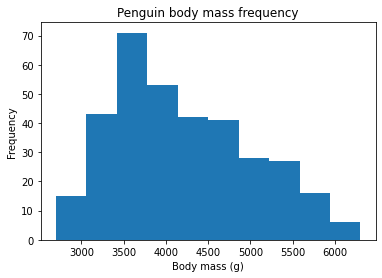

In [ ]:
# create a figure and axis
fig, ax = plt.subplots()

# plot the frequency of penguin body mass.
ax.hist(penguins['body_mass_g'], bins = 10) 

# set a title and labels
ax.set_title('Penguin body mass frequency')
ax.set_xlabel('Body mass (g)')
ax.set_ylabel('Frequency');

plt.plot
plt.show();

We can edit the look of the graph with the following tweaks to the code.

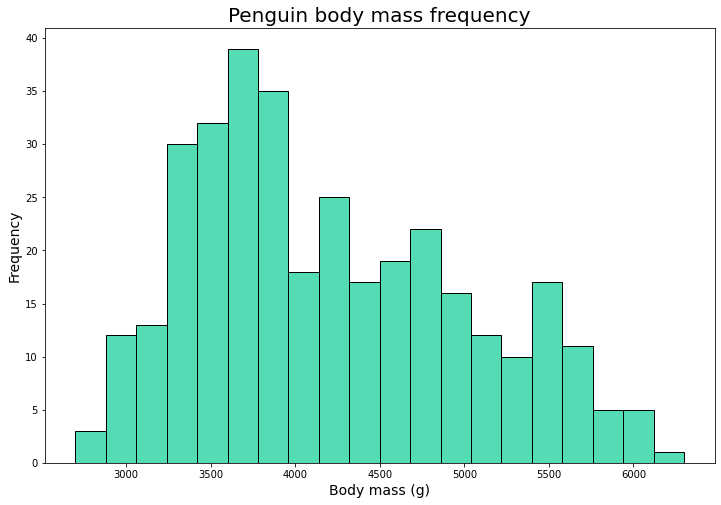

In [ ]:
# create a figure and axis
fig, ax = plt.subplots(figsize=(12, 8)) #Change figure size

# plot the frequency of penguin body mass.
ax.hist(penguins['body_mass_g'], bins = 20, color = "#55DCB4", edgecolor = 'black') #Aqua histogram, black outlines, more bins

# set a title and labels
ax.set_title('Penguin body mass frequency', fontsize = 20) #Change font size
ax.set_xlabel('Body mass (g)', fontsize = 14) #Change font size
ax.set_ylabel('Frequency', fontsize = 14) #Change font size

plt.plot
plt.show();

###Seaborn

In seaborn we can use `histplot` for creating histograms.

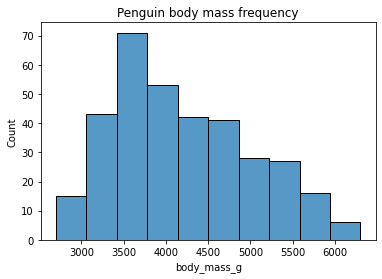

In [ ]:
sns.histplot(data = penguins ,x = 'body_mass_g', bins=10).set_title("Penguin body mass frequency");

Graphs can be customised as below.

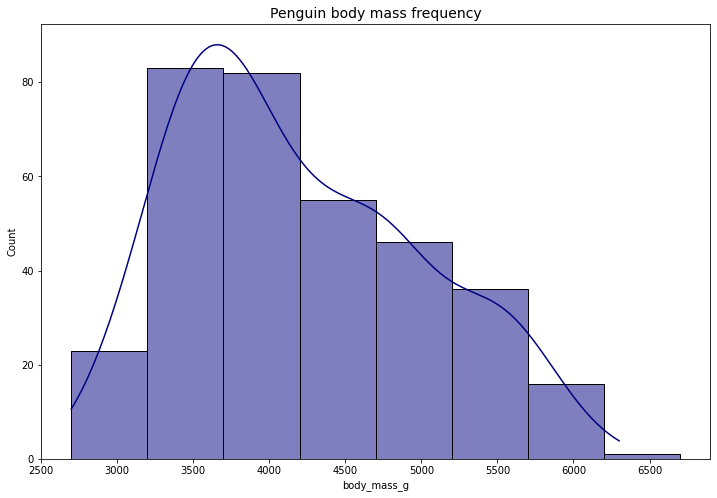

In [ ]:
plt.figure(figsize=(12,8)) #use matplotlib to create a larger figure

sns.histplot(data = penguins, x = 'body_mass_g', 
             color='navy', #change graph colour to navy
             binwidth = 500, #assign bin width rather than number of bins
             alpha=0.5, #set colour opacity to 0.7
             kde = True #add KDE density line to see distribution clearly
             ).set_title("Penguin body mass frequency", fontsize=14);

We can even use `hue` to plot the distribution of a variable within different groups.

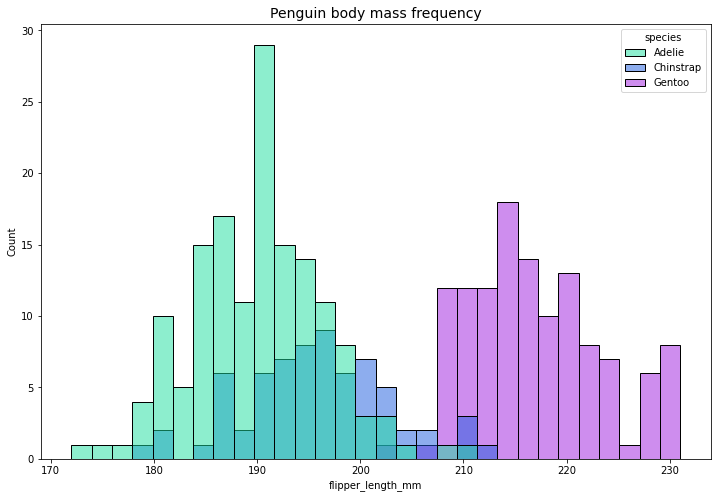

In [ ]:
plt.figure(figsize=(12,8)) #use matplotlib to create a larger figure

#choose colour palette
colours = ('#1DDF9F','#1D5DDF','#9F1DDF')

#plot histogram
sns.histplot(data = penguins ,x = 'flipper_length_mm', hue='species', bins=30, palette=colours, alpha=0.5).set_title("Penguin body mass frequency", fontsize=14);

###Exercise 5
Plot a histogram using the iris dataset showing the frequency of the petal length by species.

In [ ]:
#Enter answer here


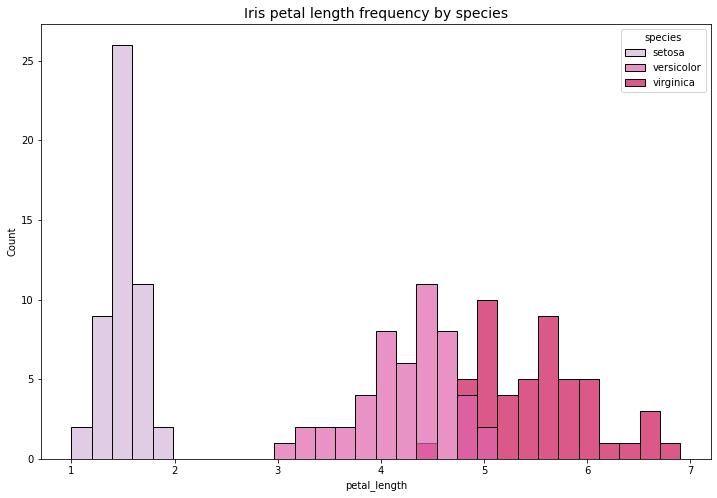

In [ ]:
#@title Click here for answers
plt.figure(figsize=(12,8)) #use matplotlib to create a larger figure

#plot histogram
sns.histplot(data = iris ,x = 'petal_length', hue='species', bins=30, palette='PuRd', alpha=0.7).set_title("Iris petal length frequency by species", fontsize=14);

##**Boxplots**

Boxplots show a visual representation of the median, range, minimum, maximum and quartiles of a set of data. They are useful in understanding the spread of data and spotting outliers.

###Matplotlib
We can create simple boxplots using the `boxplot` function.

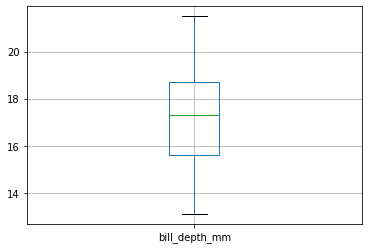

In [ ]:
# Create a boxplot of one field
penguins.boxplot(column='bill_depth_mm')
plt.show()

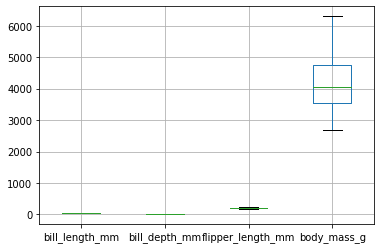

In [ ]:
#Create boxplots of all numerical fields on one graph.

#create a dataset that restricts to only the numerical fields
penguins_num = penguins[['bill_length_mm',	'bill_depth_mm',	'flipper_length_mm',	'body_mass_g']]

#Plot boxplot
penguins_num.boxplot()
plt.show()

In [ ]:
penguins

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
...,...,...,...,...,...,...,...
339,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,Female
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,Male
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,Female


###Seaborn

We can also use `boxplot` with seaborn.

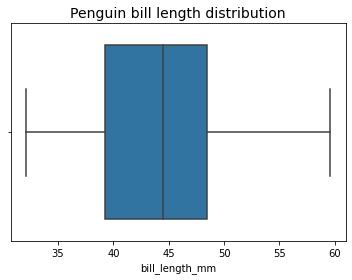

In [ ]:
# One field
sns.boxplot(data=penguins, x = 'bill_length_mm').set_title("Penguin bill length distribution", fontsize=14);

This can be flipped to a vertical boxplot by changing `x = 'bill_length_mm'` to `y = 'bill_length_mm'`.

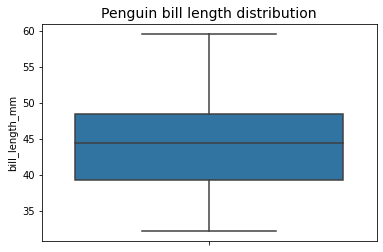

In [ ]:
# One field
sns.boxplot(data=penguins, y = 'bill_length_mm').set_title("Penguin bill length distribution", fontsize=14);

We can show multiple field distibutions on one graph. This can be helpful for datasets with similar scales for each field however, for the penguins dataset, it isn't the most informative.

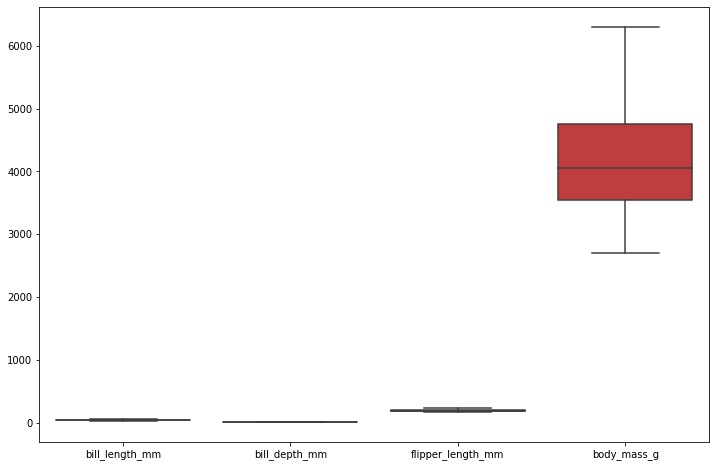

In [ ]:
plt.figure(figsize=(12,8))

sns.boxplot(data=penguins)

We can also customise our graphs as follows:

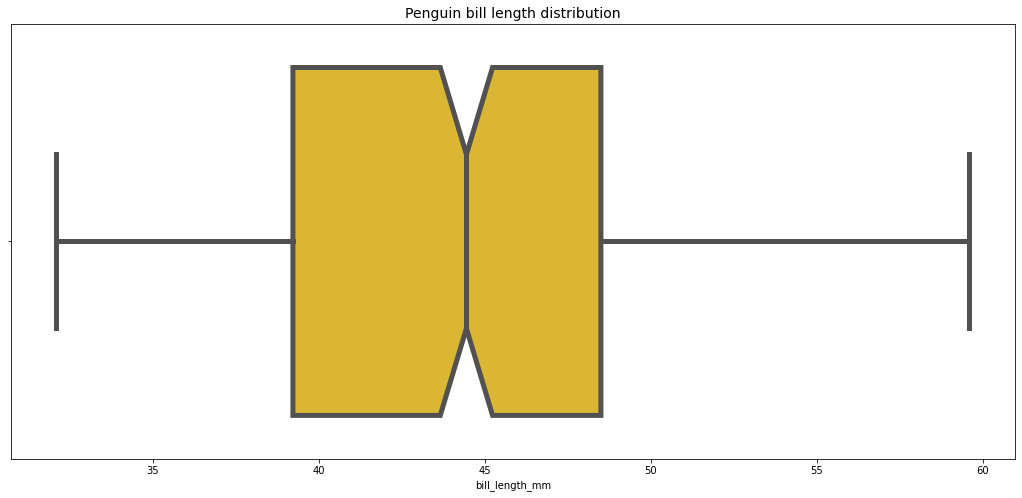

In [ ]:
# One field
plt.figure(figsize=(18,8))

sns.boxplot(data=penguins, x = 'bill_length_mm', 
            linewidth=5, #increase line width
            notch=True, #add notch
            color='#F7C518' #change colour
            ).set_title("Penguin bill length distribution", fontsize=14);

By assigning x as a categorical variable, in this case island, we can split out the distributions by their categories.

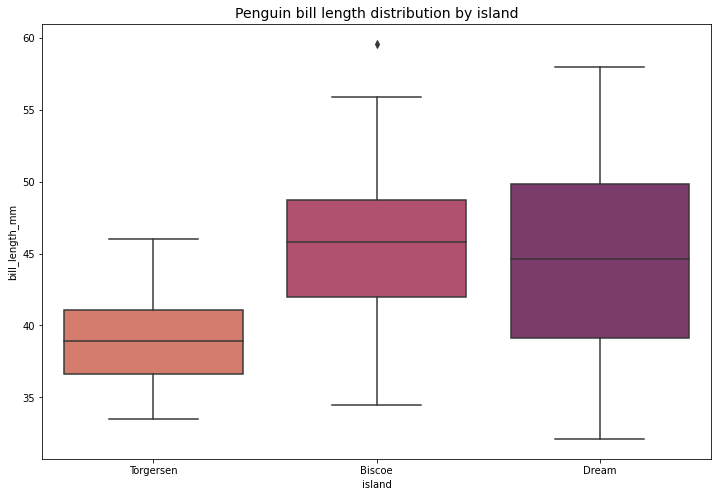

In [ ]:
plt.figure(figsize=(12,8))

#plot boxplot
sns.boxplot(data=penguins, x='island', y = 'bill_length_mm', palette='flare').set_title("Penguin bill length distribution by island", fontsize=14);

Returning back to the flight data we used previously in our line graph example, boxplots can show the same levels of data as the line graph as well as capture the distribution of the data for each period.

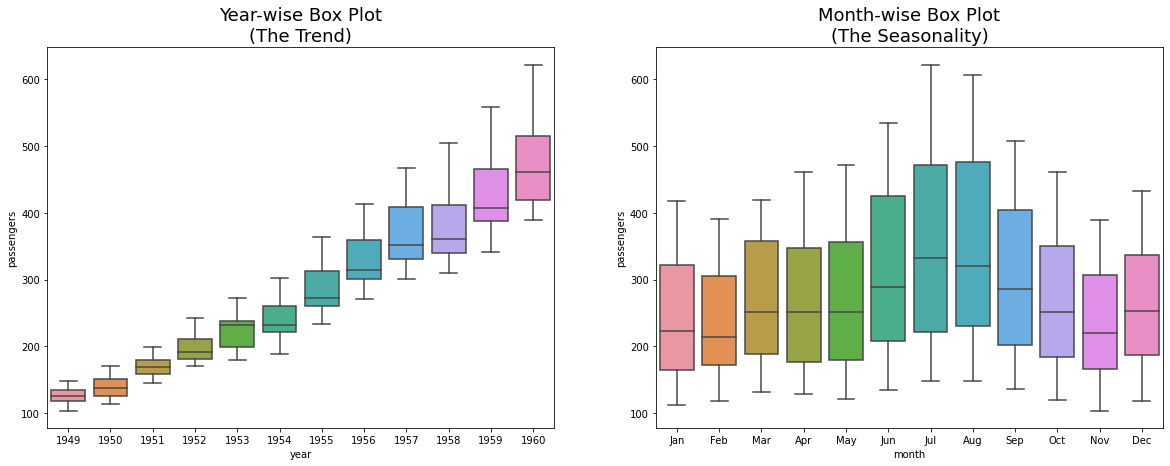

In [ ]:
# Create the plot

fig, axes = plt.subplots(1, 2, figsize=(20,7))
sns.boxplot(x='year', y='passengers', data=flights, ax=axes[0])
sns.boxplot(x='month', y='passengers', data=flights)

# Set Title
axes[0].set_title('Year-wise Box Plot\n(The Trend)', fontsize=18); #we can use \n to add a linebreak
axes[1].set_title('Month-wise Box Plot\n(The Seasonality)', fontsize=18)
plt.show()

###Exercise 6

Plot a boxplots of all fields within the iris dataset.

In [ ]:
#Enter answer here

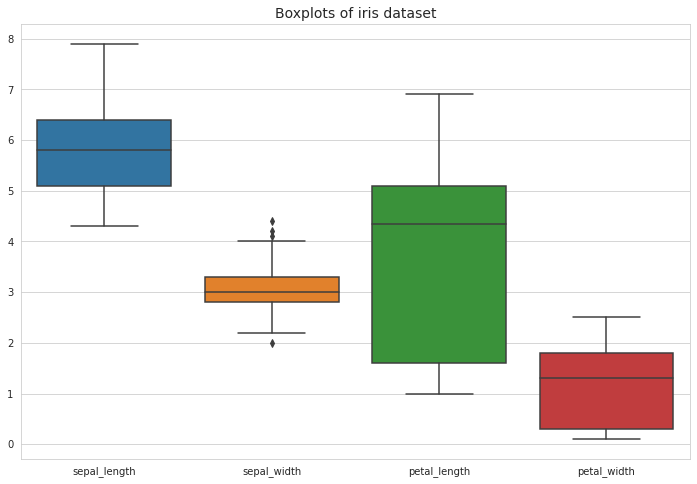

In [ ]:
#@title Click for answers
plt.figure(figsize=(12,8))

box = sns.boxplot(data=iris).set_title('Boxplots of iris dataset', fontsize='14');

##**Heatmap**
A heatmap is a two-dimensional graphical representation of data where the individual values that are contained in a matrix are represented as colours. The spectrum of colours indicated the level of correlation between the variables.

These are best created in seaborn.

###Seaborn
We can plot heatmaps with the `heatmap` function.

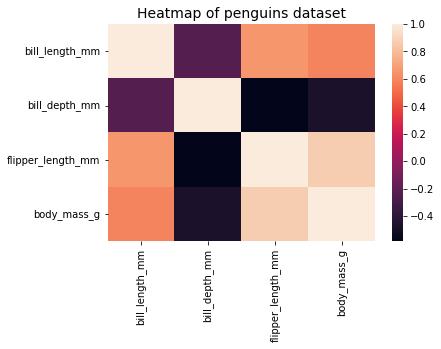

In [ ]:
#Plot heatmap
sns.heatmap(penguins.corr()).set_title("Heatmap of penguins dataset", fontsize=14);

These can be customised.

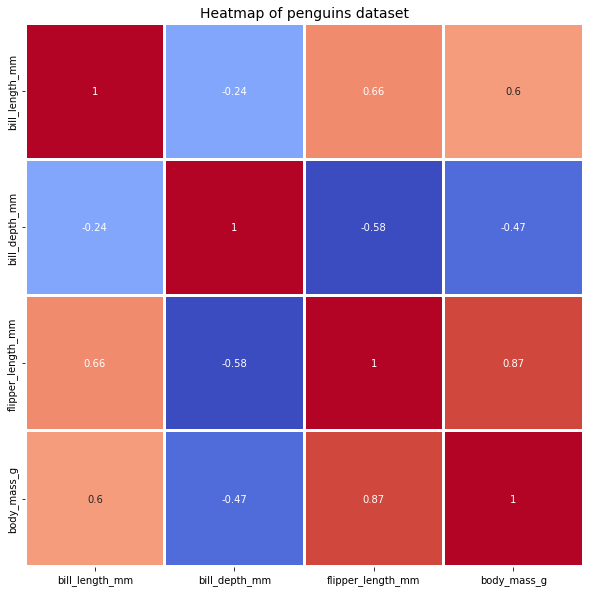

In [ ]:
#Figure size
plt.figure(figsize=(10,10)) #make bigger

#Plot heatmap
sns.heatmap(penguins.corr(), #default is Pearson but others like Spearman and Kendall can also be used
            annot=True, #add annotations 
            cmap = 'coolwarm', #add colour palette - this one makes positive and negative correlations very clear
            cbar=False, #remove colour bar
            linewidths=2, # add lines between the squares of the matrix
            linecolor='white' #assign a colour
            ).set_title("Heatmap of penguins dataset", fontsize=14);

###Exercise 7
Create a customised heatmap of the iris dataset.

In [ ]:
#Enter answer here

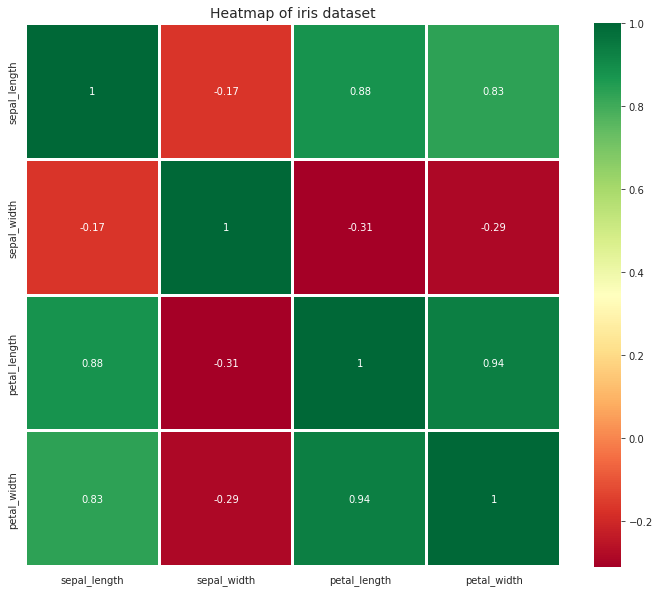

In [ ]:
#@title Click here for answers
#Figure size
plt.figure(figsize=(12,10)) #make bigger

#Plot heatmap
sns.heatmap(iris.corr(method='spearman'), #Spearman method
            annot=True, #add annotations 
            cmap = 'RdYlGn', #add colour palette 
            linewidths=2, # add lines between the squares of the matrix
            linecolor='white' #assign a colour
            ).set_title("Heatmap of iris dataset", fontsize=14);

##**Subplots**
The `subplots` function allows us to plot multiple plots in the same figure. The numbers within the function indictate the configuration of the subplots: `subplots([number of rows],[number of columns])`

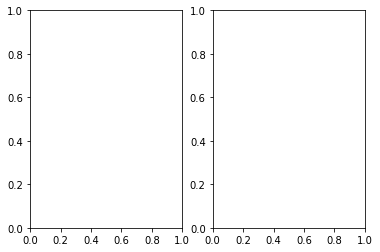

In [ ]:
#A 1x2 configuration
fig, ax = plt.subplots(1,2)

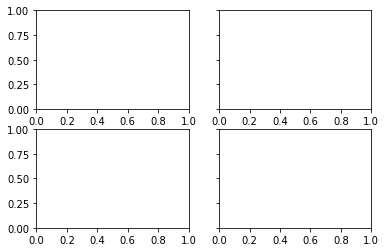

In [ ]:
#A 2x2 configuration where the y axis is shared between the plots - this can make it look less messy.
fig, ax = plt.subplots(2,2, sharey=True)

Lets look at an example with data from the penguins dataset. We use `ax[0]` and `ax[1]` to indicate which subplot we want to plot our graph on 

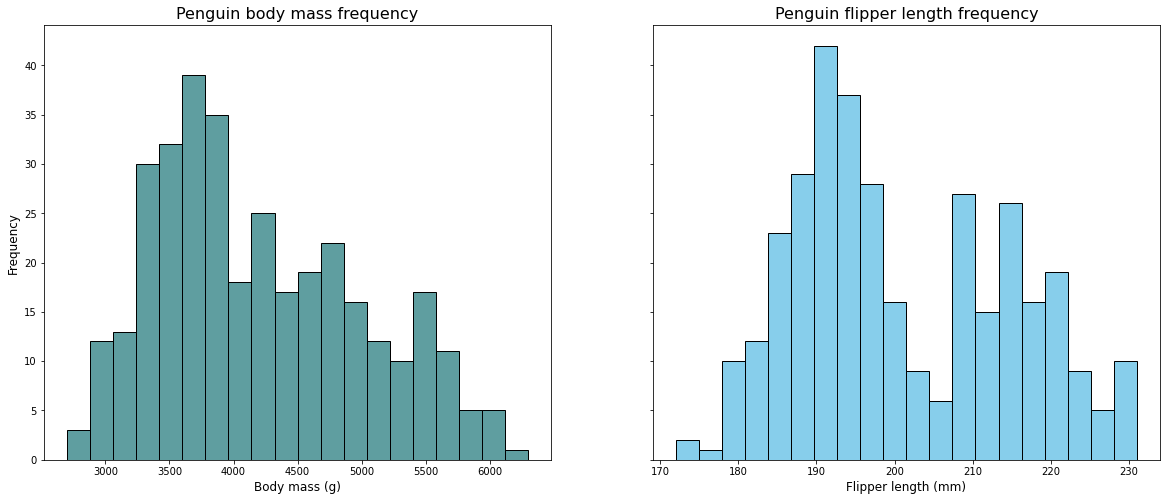

In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(20,8), sharey=True)

ax[0].hist(penguins['body_mass_g'], bins = 20, color='cadetblue', edgecolor = 'black')
ax[0].set_title('Penguin body mass frequency', fontsize = 16) #Change font size
ax[0].set_xlabel('Body mass (g)', fontsize = 12) #Change font size
ax[0].set_ylabel('Frequency', fontsize = 12) #Change font size

ax[1].hist(penguins['flipper_length_mm'], bins = 20, color='skyblue', edgecolor = 'black')
ax[1].set_title('Penguin flipper length frequency', fontsize = 16) #Change font size
ax[1].set_xlabel('Flipper length (mm)', fontsize = 12); #Change font size

We can use this same technique to show different visualisations within each of the subplots.

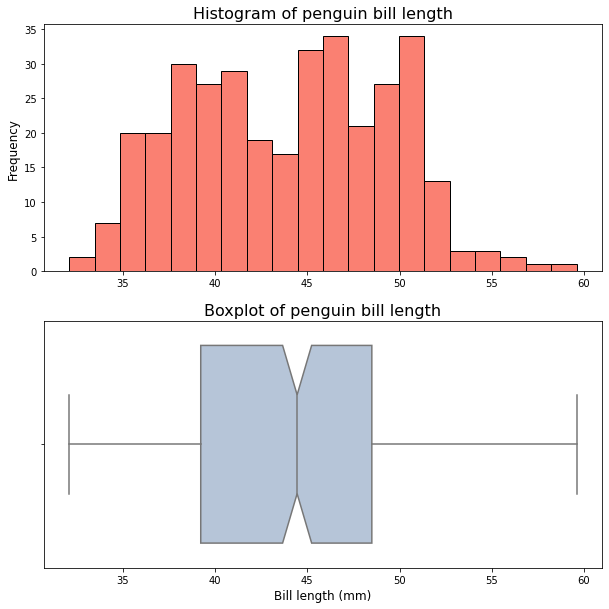

In [ ]:
fig, ax = plt.subplots(2, 1, figsize=(10,10))

ax[0].hist(penguins['bill_length_mm'], bins = 20, color='salmon', edgecolor = 'black')
ax[0].set_title('Histogram of penguin bill length', fontsize = 16) 
ax[0].set_ylabel('Frequency', fontsize = 12) 

sns.boxplot(ax=ax[1],data=penguins, x = 'bill_length_mm', notch=True, color='lightsteelblue')
ax[1].set_title('Boxplot of penguin bill length', fontsize = 16) 
ax[1].set_xlabel('Bill length (mm)', fontsize = 12);

###Exercise 8

Create 2x2 subplots of your choice of data from the iris dataset.

In [ ]:
#Enter answer here

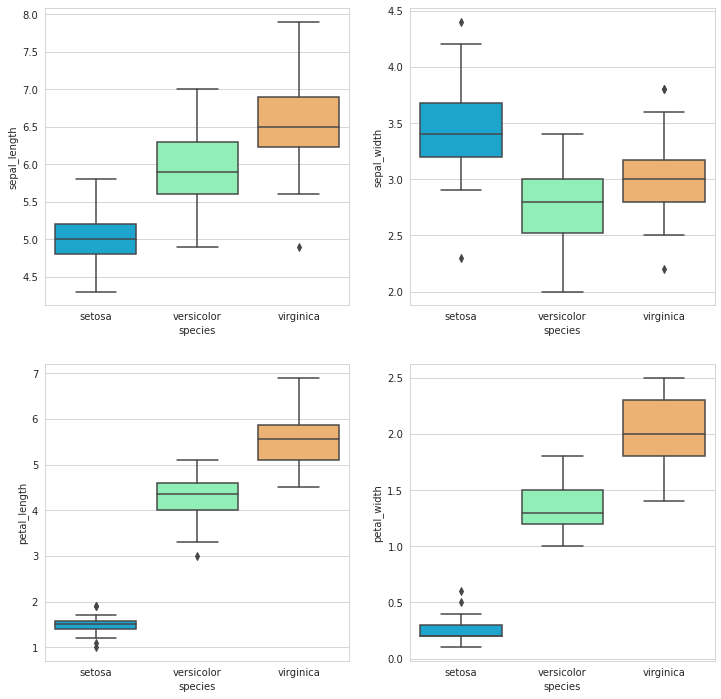

In [ ]:
#@title Click here for answers
#define plotting region (2 rows, 2 columns)
fig, axes = plt.subplots(2, 2, figsize=(12,12))

#plots
sns.boxplot(data=iris, x='species', y='sepal_length', ax=axes[0,0], palette = 'rainbow')
sns.boxplot(data=iris, x='species', y='sepal_width', ax=axes[0,1], palette = 'rainbow')
sns.boxplot(data=iris, x='species', y='petal_length', ax=axes[1,0], palette = 'rainbow')
sns.boxplot(data=iris, x='species', y='petal_width', ax=axes[1,1], palette = 'rainbow');

##**Summary**
This workbook has provided you with the tools to begin creating your own data visualisations in Python using Matplotlib and Seaborn. These are just a two of the many libraries out there that you can use. If you are keen to explore more visualisations the following libraries may be a good place to start:

```
*   Bokeh
*   Plotly
*   GGplot
*   Pygal
```
...and many more!


# **Feedback**

Please complete the below anonymous feedback.

In [ ]:
#@title
%%html

<iframe src="https://docs.google.com/forms/d/e/1FAIpQLSes8_uJvzGjLNjhj4cCyyC2Rd5qPQ4hep-87lmvxh1LYW25IA/viewform?embedded=true" width="640" height="499" frameborder="0" marginheight="0" marginwidth="0">Loading…</iframe>